### Importação dos dados



In [16]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [17]:
faturamento_loja1 = loja['Preço'].astype(float).sum()
faturamento_loja2 = loja2['Preço'].astype(float).sum()
faturamento_loja3 = loja3['Preço'].astype(float).sum()
faturamento_loja4 = loja4['Preço'].astype(float).sum()

print(f"Faturamento Loja 1: R${faturamento_loja1:.2f}")
print(f"Faturamento Loja 2: R${faturamento_loja2:.2f}")
print(f"Faturamento Loja 3: R${faturamento_loja3:.2f}")
print(f"Faturamento Loja 4: R${faturamento_loja4:.2f}")

faturamento_total = faturamento_loja1 + faturamento_loja2 + faturamento_loja3 + faturamento_loja4
print(f"\nFaturamento total de todas as lojas: R${faturamento_total:.2f}")

Faturamento Loja 1: R$1534509.12
Faturamento Loja 2: R$1488459.06
Faturamento Loja 3: R$1464025.03
Faturamento Loja 4: R$1384497.58

Faturamento total de todas as lojas: R$5871490.79


# 2. Vendas por Categoria


In [18]:
def vendas_por_categoria(loja, numero):
  vendas = loja.groupby('Categoria do Produto')['Preço'].sum()
  print(f"\nVendas por categoria na Loja{numero}:")
  print(vendas)

vendas_por_categoria(loja, 1)
vendas_por_categoria(loja2, 2)
vendas_por_categoria(loja3, 3)
vendas_por_categoria(loja4, 4)


Vendas por categoria na Loja1:
Categoria do Produto
brinquedos                23993.78
eletrodomesticos         484913.36
eletronicos              572659.23
esporte e lazer           52387.55
instrumentos musicais    121731.69
livros                    11713.92
moveis                   250178.11
utilidades domesticas     16931.48
Name: Preço, dtype: float64

Vendas por categoria na Loja2:
Categoria do Produto
brinquedos                21262.21
eletrodomesticos         464758.13
eletronicos              547773.71
esporte e lazer           46326.09
instrumentos musicais    139987.03
livros                    13454.35
moveis                   235234.68
utilidades domesticas     19662.86
Name: Preço, dtype: float64

Vendas por categoria na Loja3:
Categoria do Produto
brinquedos                25869.20
eletrodomesticos         438984.89
eletronicos              547699.92
esporte e lazer           47456.10
instrumentos musicais    103174.45
livros                    12664.70
moveis         

# 3. Média de Avaliação das Lojas

In [19]:
def avaliacao_media(loja, numero):
  media = loja['Avaliação da compra'].mean()
  print(f"Avaliação média da Loja {numero}: {media:.2f}")

avaliacao_media(loja, 1)
avaliacao_media(loja2, 2)
avaliacao_media(loja3, 3)
avaliacao_media(loja4, 4)

Avaliação média da Loja 1: 3.98
Avaliação média da Loja 2: 4.04
Avaliação média da Loja 3: 4.05
Avaliação média da Loja 4: 4.00


# 4. Produtos Mais e Menos Vendidos

In [20]:
urls = [url, url2, url3, url4]

df_list = []
for i, url in enumerate(urls):
  df = pd.read_csv(url)
  df['Loja'] = i + 1  # Assign store number
  df_list.append(df)

df_total = pd.concat(df_list, ignore_index=True)

df_total['Preço'] = df_total['Preço'].astype(float)

df_total['Receita'] = df_total['Preço']

vendas = df_total.groupby(['Loja', 'Produto'])['Receita'].sum().reset_index()

def top_produtos(loja):
  dados = vendas[vendas['Loja'] == loja]

  top_mais_vendidos = dados.sort_values(by='Receita', ascending=False).head(3)
  top_menos_vendidos = dados.sort_values(by='Receita', ascending=True).head(3)

  print(f"\nLoja {loja} - TOP 3 produtos que mais dinheiro geraram:")
  for _, linha in top_mais_vendidos.iterrows():
        print(f"  {linha['Produto']} - Receita: R${linha['Receita']:.2f}")

  print(f"\nLoja {loja} - TOP 3 produtos que menos dinheiro geraram:")
  for _, linha in top_menos_vendidos.iterrows():
        print(f"  {linha['Produto']} - Receita: R${linha['Receita']:.2f}")

lojas_unicas = vendas['Loja'].unique()

for loja in lojas_unicas:
  top_produtos(loja)


Loja 1 - TOP 3 produtos que mais dinheiro geraram:
  TV Led UHD 4K - Receita: R$189534.28
  Geladeira - Receita: R$149524.28
  Celular Plus X42 - Receita: R$130536.40

Loja 1 - TOP 3 produtos que menos dinheiro geraram:
  Corda de pular - Receita: R$870.89
  Dinossauro Rex - Receita: R$918.40
  Cubo mágico 8x8 - Receita: R$929.27

Loja 2 - TOP 3 produtos que mais dinheiro geraram:
  Celular Plus X42 - Receita: R$150967.83
  TV Led UHD 4K - Receita: R$137833.06
  Geladeira - Receita: R$130176.48

Loja 2 - TOP 3 produtos que menos dinheiro geraram:
  Cubo mágico 8x8 - Receita: R$858.22
  Dinossauro Rex - Receita: R$1027.41
  Corda de pular - Receita: R$1142.54

Loja 3 - TOP 3 produtos que mais dinheiro geraram:
  Geladeira - Receita: R$133185.99
  TV Led UHD 4K - Receita: R$128892.11
  Celular Plus X42 - Receita: R$124300.84

Loja 3 - TOP 3 produtos que menos dinheiro geraram:
  Cubo mágico 8x8 - Receita: R$853.81
  Dinossauro Rex - Receita: R$1060.78
  Corda de pular - Receita: R$1137.

# 5. Frete Médio por Loja


In [21]:
df_total['Frete'] = df_total['Frete'].astype(float)

frete_medio = df_total.groupby('Loja')['Frete'].mean()

print("\nFrete médio por loja:")
for loja, frete in frete_medio.items():
    print(f"Loja {loja}: R${frete:.2f}")



Frete médio por loja:
Loja 1: R$34.69
Loja 2: R$33.62
Loja 3: R$33.07
Loja 4: R$31.28


#Gráficos

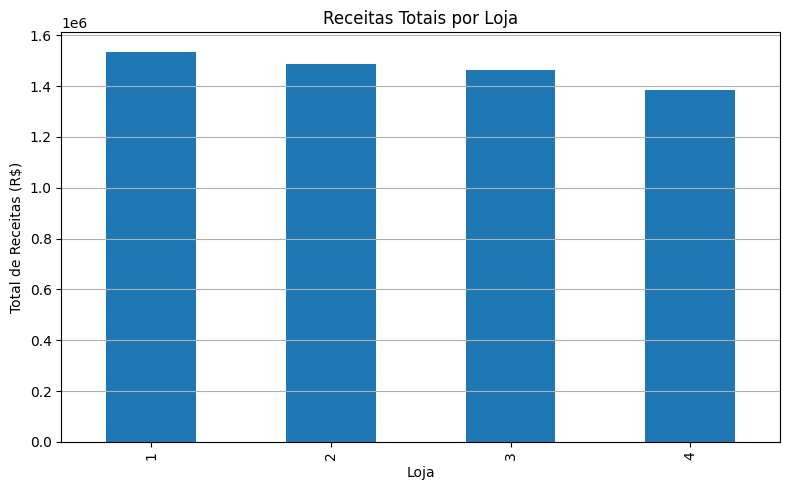

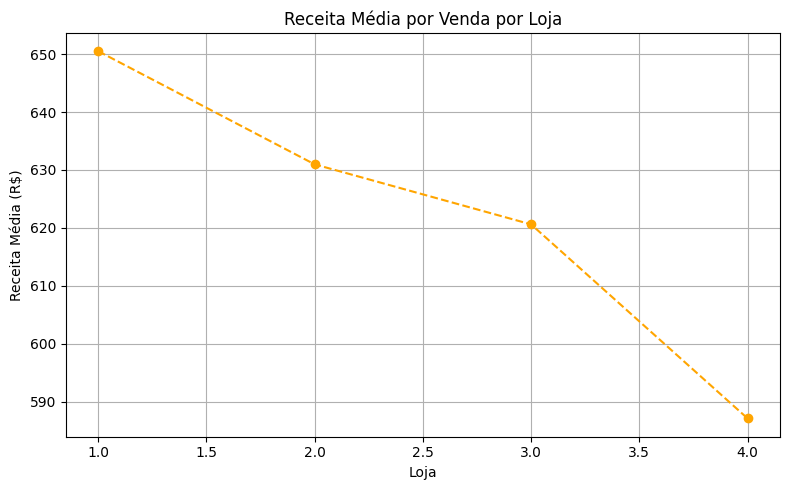

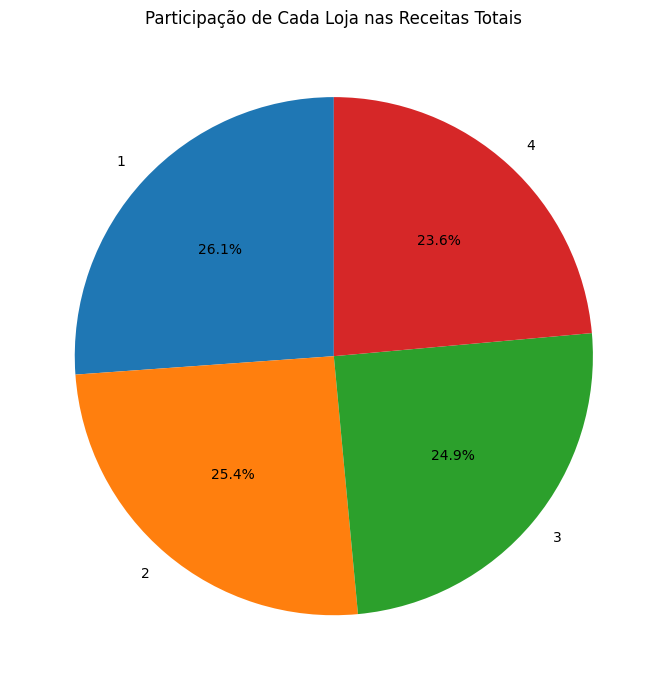

In [22]:
import matplotlib.pyplot as plt

df_total['Preço'] = df_total['Preço'].astype(float)
df_total['Receita'] = df_total['Preço']

receitas_totais = df_total.groupby('Loja')['Receita'].sum()
receita_media = df_total.groupby('Loja')['Receita'].mean()
distribuicao_receitas = receitas_totais

#1. Gráfico de Barra: Total de Receitas
plt.figure(figsize=(8,5))
receitas_totais.plot(kind='bar')
plt.title('Receitas Totais por Loja')
plt.ylabel('Total de Receitas (R$)')
plt.xlabel('Loja')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

#2. Gráfico de Linha: Receita Média por Venda
plt.figure(figsize=(8,5))
receita_media.plot(kind='line', marker='o', linestyle='--', color='orange')
plt.title('Receita Média por Venda por Loja')
plt.ylabel('Receita Média (R$)')
plt.xlabel('Loja')
plt.grid(True)
plt.tight_layout()
plt.show()

#3. Gráfico de Pizza: Distribuição do Total
plt.figure(figsize=(7,7))
distribuicao_receitas.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Participação de Cada Loja nas Receitas Totais')
plt.ylabel('')
plt.tight_layout()
plt.show()

#Relatório  

Diante das informações que foram tratadas e analisadas, recomendamos, a princípio, ao Sr. João que venda a Loja 4.

Analisando o faturamento das quatro lojas, a Loja 4 foi a que apresentou o menor faturamento dentre as demais, obtendo um faturamento de R$ 1.384.497,58.

Considerando a receita média de venda, a Loja 4 também apresentou o pior índice em relação as demais lojas. Obtendo uma receita média de R$ 587,15.

Por fim, se considerarmos o custo do frete médio por loja, a Loja 4 é a que apresenta o menor custo de R$ 31,28. É o único ponto positivo a ser destacado na Loja 4.

Dessa forma, apesar de recomendarmos a priori a venda da Loja 4 para o Sr. João, com base nas informações que foram levantadas, faz-se necessário analisar mais informações, como o Fluxo de Caixa, o Demonstrativo do Resultado Operacional (DRE), Balanço Patrimonial, Capital de Giro, e os Indicadores econômico-financeiros.

Portanto, para uma análise mais crieriosa que embasaria a tomada de decisão do Sr. João, seria interessante levantar e analisar estas informações relevantes.